In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# ==== CONFIG ====
splits = ["train", "val", "test"]
time_categories = ["daytime", "night", "dawn"]

CLASSES = [
    "person",       # 0
    "rider",        # 1
    "car",          # 2
    "truck",        # 3
    "bus",          # 4
    "train",        # 5
    "motor",        # 6  
    "bike",         # 7  
    "traffic light",# 8
    "traffic sign"  # 9
]



In [2]:
time_counts = Counter()
class_counts = Counter()
objects_per_image = []
class_time_counts = {cat: Counter() for cat in time_categories}


for split in splits:
    for cat in time_categories:
        labels_dir = f"final_dataset/{split}/labels/{cat}"
        if not os.path.exists(labels_dir):
            continue

        for json_file in os.listdir(labels_dir):
            if not json_file.endswith(".json"):
                continue
            
            with open(os.path.join(labels_dir, json_file), "r") as f:
                data = json.load(f)
            time_counts[cat] += 1

            objects = data["frames"][0]["objects"]
            objects_per_image.append(len(objects))

            for obj in objects:
                category = obj["category"]
                if category not in CLASSES:
                    continue

                class_counts[category] += 1
                class_time_counts[cat][category] += 1

print("✅ JSON parsing done")
print("Time of Day:", dict(time_counts))
print("Classes:", dict(class_counts))


✅ JSON parsing done
Time of Day: {'daytime': 52504, 'night': 39993, 'dawn': 7287}
Classes: {'person': 129268, 'traffic sign': 343698, 'car': 1020630, 'traffic light': 265935, 'bus': 16474, 'rider': 6461, 'bike': 10231, 'motor': 4285, 'truck': 42914, 'train': 179}


In [3]:
from collections import Counter
import os, json
from tqdm import tqdm

weather_counts = Counter()
scene_counts = Counter()

for split in ["train", "val", "test"]:   # غيّر حسب تقسيمك
    for cat in ["daytime", "night", "dawn"]:  
        labels_dir = f"final_dataset/{split}/labels/{cat}"
        if not os.path.exists(labels_dir):
            continue

        for json_file in tqdm(os.listdir(labels_dir), desc=f"{split}/{cat}"):
            if not json_file.endswith(".json"):
                continue

            with open(os.path.join(labels_dir, json_file), "r") as f:
                data = json.load(f)

            attrs = data.get("attributes", {})
            if "weather" in attrs:
                weather_counts[attrs["weather"]] += 1
            if "scene" in attrs:
                scene_counts[attrs["scene"]] += 1

print("✅ Parsing done")
print("Weather:", dict(weather_counts))
print("Scene:", dict(scene_counts))


test/dawn: 100%|██████████| 1476/1476 [00:00<00:00, 5544.10it/s]

✅ Parsing done
Weather: {'clear': 53510, 'partly cloudy': 7065, 'undefined': 11437, 'rainy': 7112, 'overcast': 12591, 'snowy': 7888, 'foggy': 181}
Scene: {'city street': 61971, 'highway': 24969, 'residential': 11735, 'tunnel': 74, 'undefined': 493, 'parking lot': 502, 'gas stations': 40}


## weights 

In [4]:
total_objects = sum(class_counts.values())
num_classes = len(class_counts)

class_weights = {
    cls: total_objects / (num_classes * count)
    for cls, count in class_counts.items()
}

max_w = max(class_weights.values())
class_weights_norm = {cls: w / max_w for cls, w in class_weights.items()}

print("Raw weights:\n", class_weights)
print("\nNormalized weights:\n", class_weights_norm)

Raw weights:
 {'person': 1.4234574682055885, 'traffic sign': 0.5353755331715634, 'car': 0.18028815535502582, 'traffic light': 0.6919265986049222, 'bus': 11.16957023188054, 'rider': 28.479724500851262, 'bike': 17.98528980549311, 'motor': 42.94224037339556, 'truck': 4.287819825697907, 'train': 1027.9748603351954}

Normalized weights:
 {'person': 0.0013847201163474335, 'traffic sign': 0.0005208060564798167, 'car': 0.00017538187198103133, 'traffic light': 0.000673096809370711, 'bus': 0.010865606410100766, 'rider': 0.027704689676520663, 'bike': 0.017495845958361844, 'motor': 0.04177362893815636, 'truck': 0.004171132963601622, 'train': 1.0}


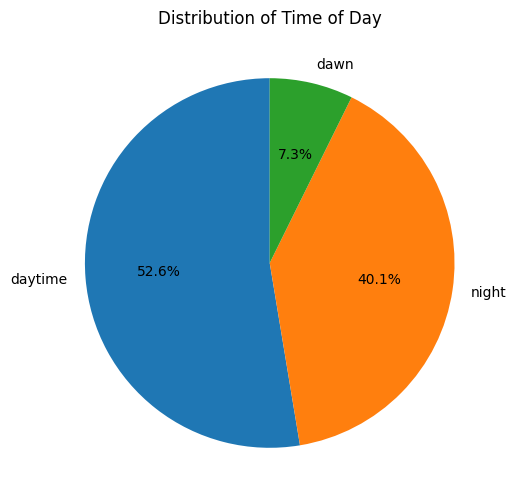

In [5]:
plt.figure(figsize=(6,6))
plt.pie(time_counts.values(), labels=time_counts.keys(), autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Time of Day")
plt.show()


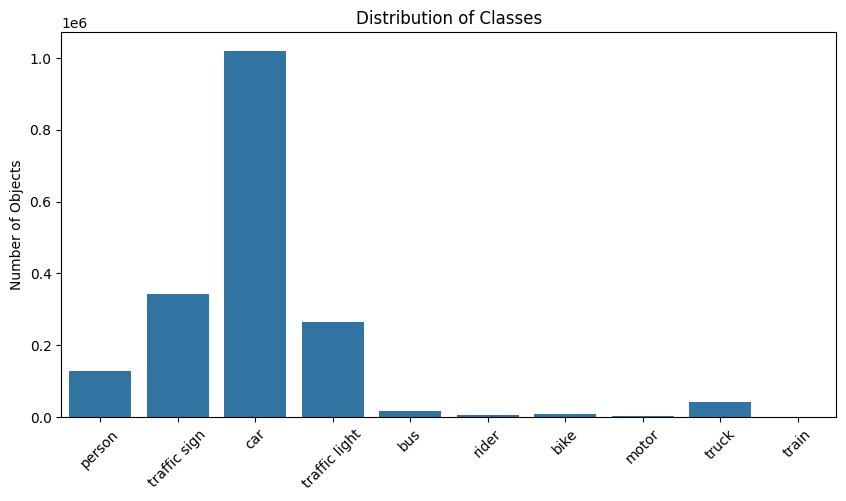

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.title("Distribution of Classes")
plt.ylabel("Number of Objects")
plt.show()


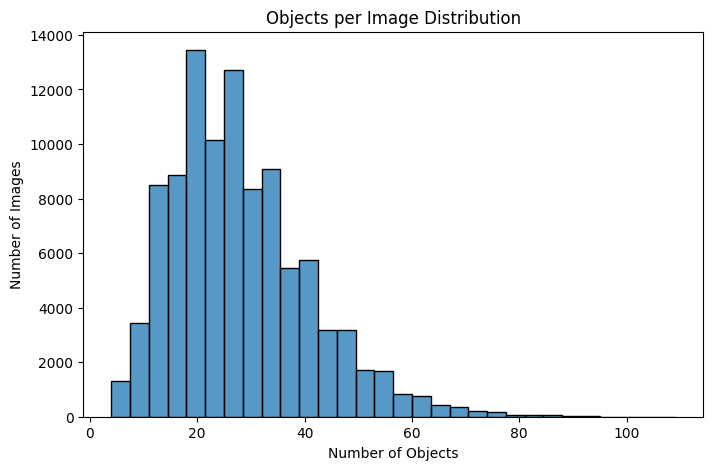

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(objects_per_image, bins=30, kde=False)
plt.title("Objects per Image Distribution")
plt.xlabel("Number of Objects")
plt.ylabel("Number of Images")
plt.show()


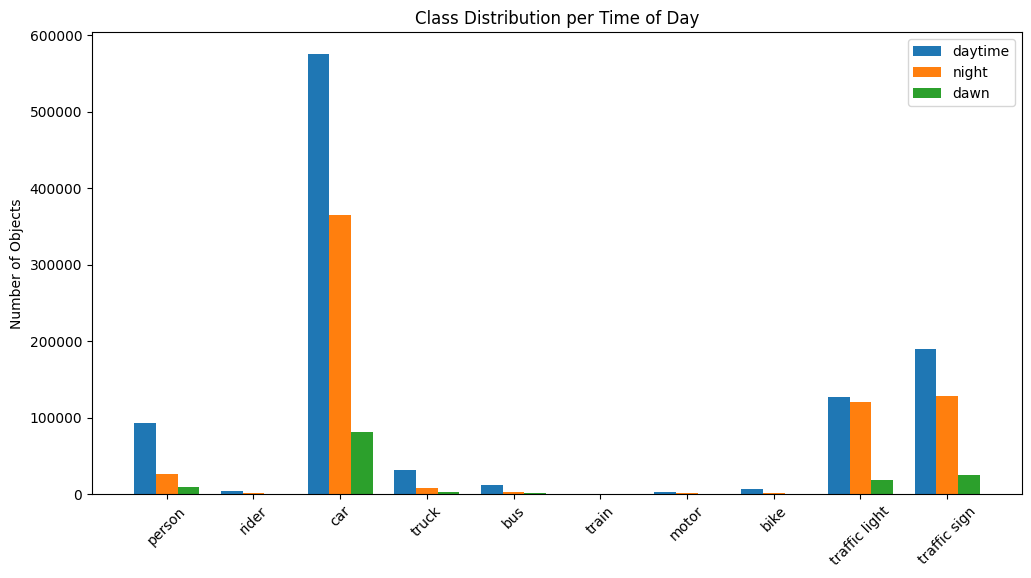

In [8]:
plt.figure(figsize=(12,6))
x = np.arange(len(CLASSES))

for i, cat in enumerate(time_categories):
    values = [class_time_counts[cat][cls] for cls in CLASSES]
    plt.bar(x + i*0.25, values, width=0.25, label=cat)

plt.xticks(x + 0.25, CLASSES, rotation=45)
plt.title("Class Distribution per Time of Day")
plt.ylabel("Number of Objects")
plt.legend()
plt.show()


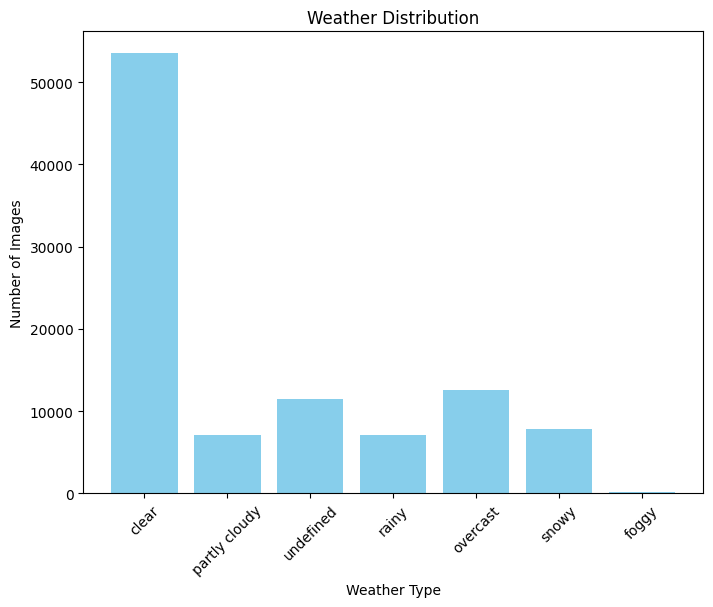

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(weather_counts.keys(), weather_counts.values(), color="skyblue")
plt.title("Weather Distribution")
plt.xlabel("Weather Type")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


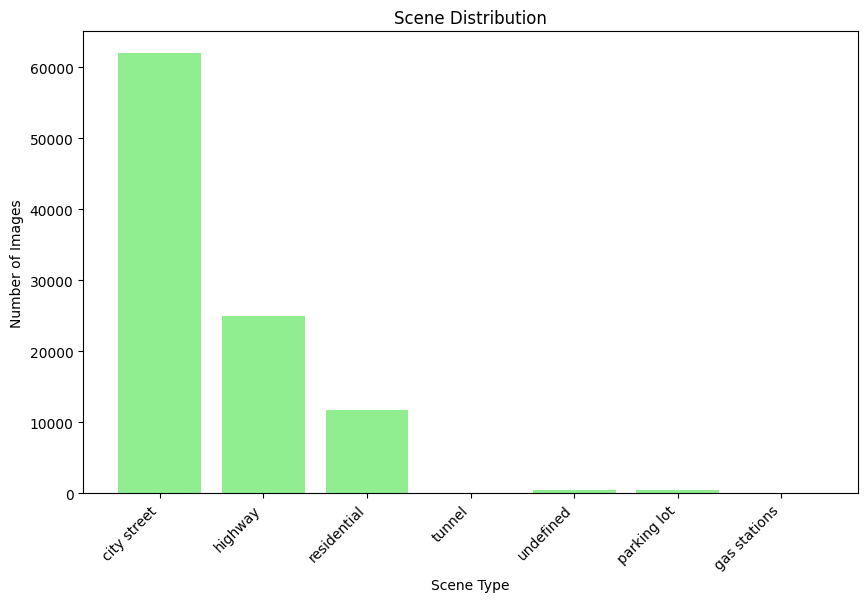

In [10]:
plt.figure(figsize=(10,6))
plt.bar(scene_counts.keys(), scene_counts.values(), color="lightgreen")
plt.title("Scene Distribution")
plt.xlabel("Scene Type")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha="right")
plt.show()
